In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
# Remove rows with missing values
df = df.dropna()
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
# Remove duplicate records
df = df.drop_duplicates()

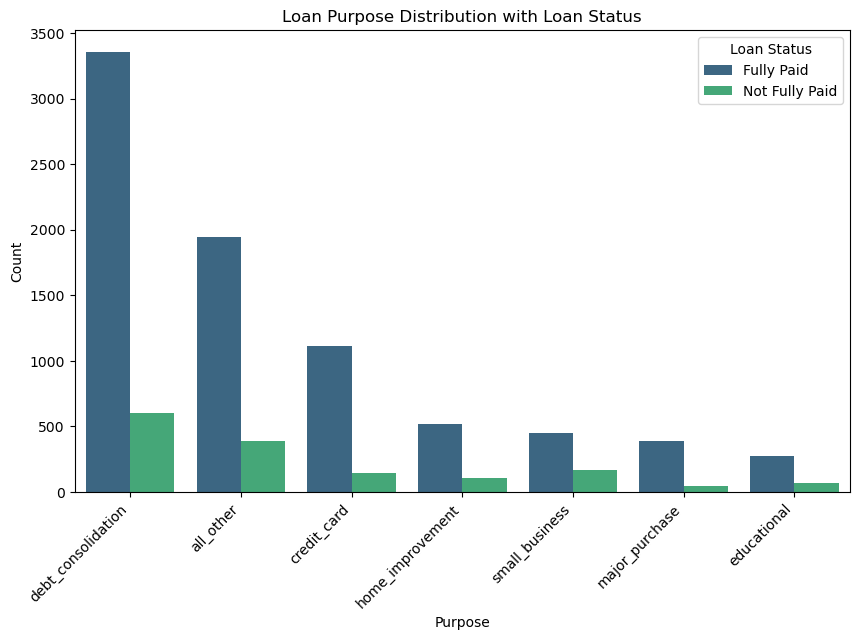

In [7]:
plt.figure(figsize=(10, 6))
order = df['purpose'].value_counts().index  # Get the order based on count
sns.countplot(x='purpose', data=df, hue='not.fully.paid', palette='viridis', order=order)
plt.title('Loan Purpose Distribution with Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status', loc='upper right', labels=['Fully Paid', 'Not Fully Paid'])
plt.show()

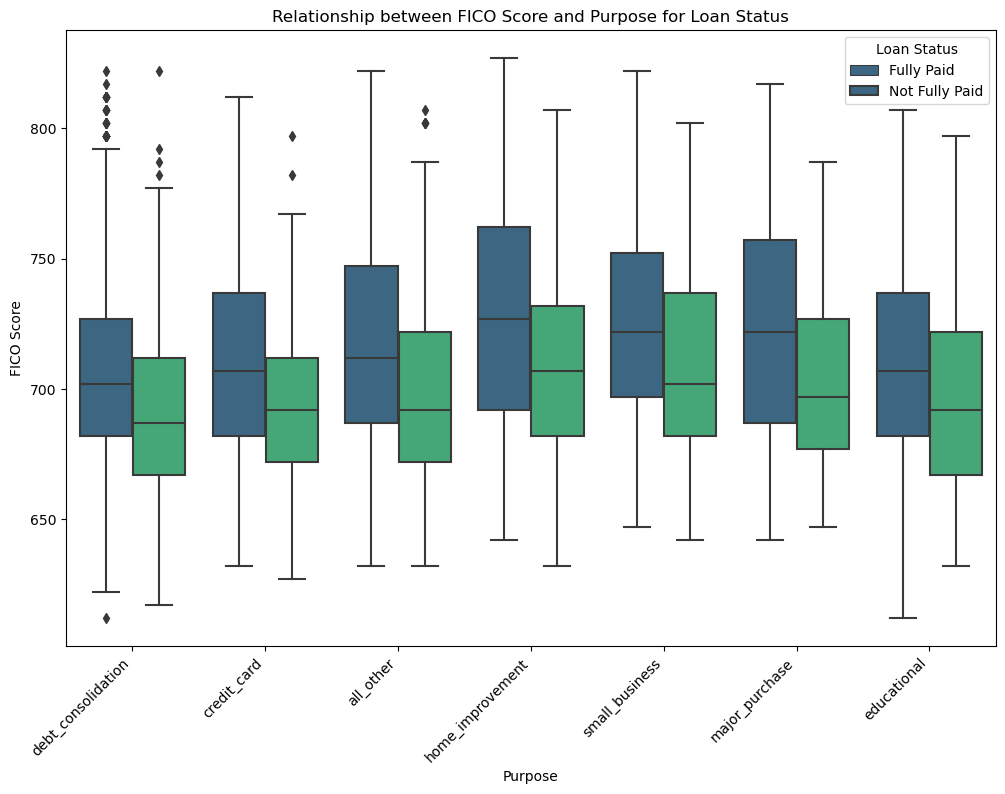

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='purpose', y='fico', hue='not.fully.paid', data=df, palette='viridis')
plt.title('Relationship between FICO Score and Purpose for Loan Status')
plt.xlabel('Purpose')
plt.ylabel('FICO Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status', loc='upper right', labels=['Fully Paid', 'Not Fully Paid'])
plt.show()

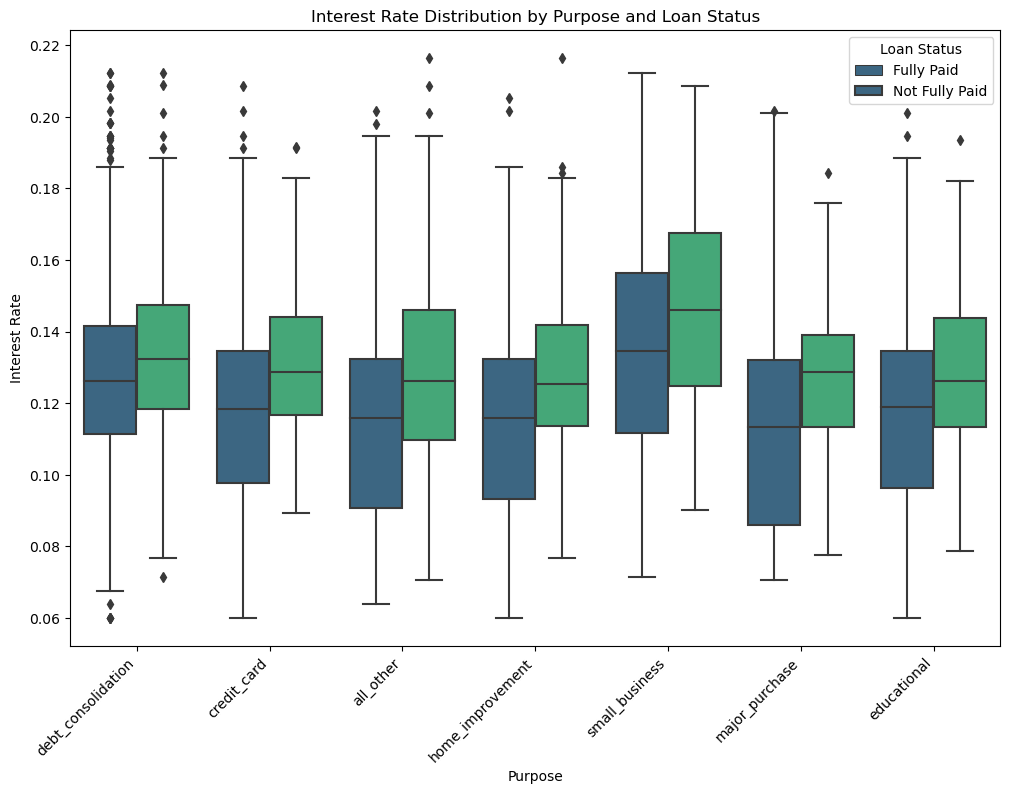

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='purpose', y='int.rate', data=df, hue='not.fully.paid', palette='viridis')
plt.title('Interest Rate Distribution by Purpose and Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status', loc='upper right', labels=['Fully Paid', 'Not Fully Paid'])
plt.show()

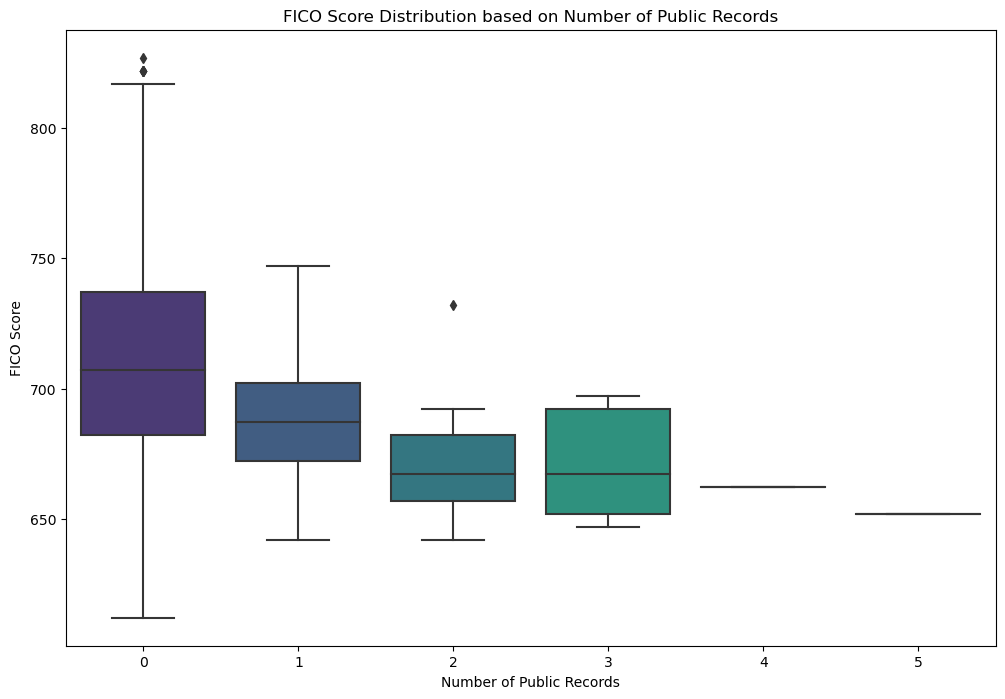

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='pub.rec', y='fico', data=df, palette='viridis')
plt.title('FICO Score Distribution based on Number of Public Records')
plt.xlabel('Number of Public Records')
plt.ylabel('FICO Score')
plt.show()

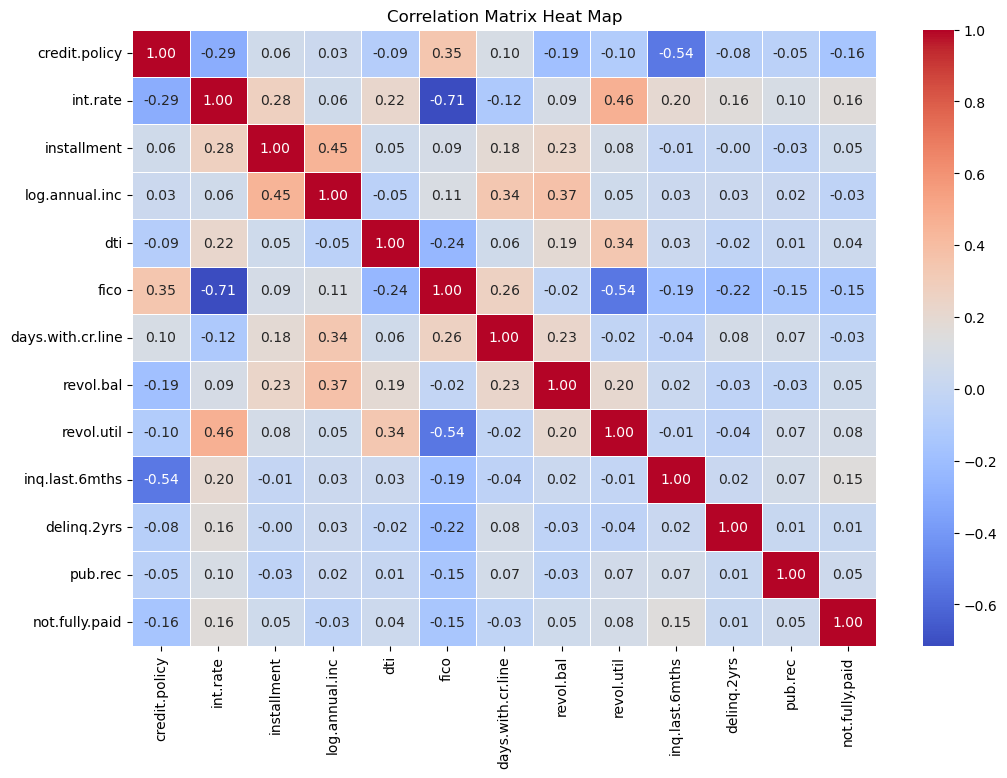

In [11]:
corr_df = df.drop(['purpose'],axis=1)
correlation_matrix = corr_df.corr()

# Create a heat map using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heat Map')
plt.show()

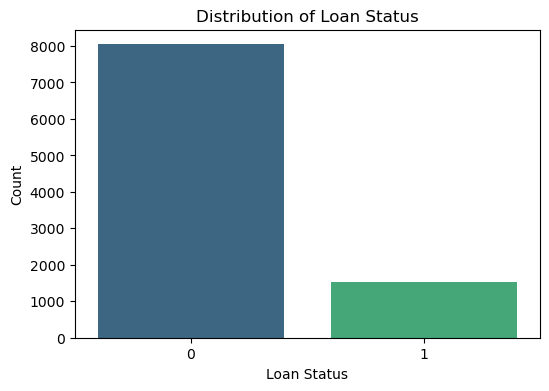

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='not.fully.paid', data=df, palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [13]:
# Categorical Feature Transformation
purpose = pd.get_dummies(df['purpose'],drop_first=True)
 
df.drop(['purpose'],axis=1,inplace=True)
 
df = pd.concat([df,purpose],axis=1)

In [14]:
X=df.drop('not.fully.paid',axis=1)

y=df['not.fully.paid']

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [39]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

y_pred = logmodel.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(conf_matrix)
print("\nRecall: ",recall)
print("Precision: ",precision)
print("F-1 score: ",f1)
print("Accuracy: ",accuracy)

[[2403    5]
 [ 459    7]]

Recall:  0.015021459227467811
Precision:  0.5833333333333334
F-1 score:  0.029288702928870296
Accuracy:  0.8385525400139179


In [18]:
#True Positive (TP): 15 instances were correctly predicted as "loan not repaid."
#True Negative (TN): 2394 instances were correctly predicted as "loan repaid."
#False Positive (FP): 14 instances were incorrectly predicted as "loan not repaid" when they were actually "loan repaid" (Type I error).
#False Negative (FN): 451 instances were incorrectly predicted as "loan repaid" when they were actually "loan not repaid" (Type II error).

#For a loan repayment model, you might want to focus on minimizing false negatives (missed opportunities to predict non-repayment) 
#or optimizing for a specific business metric like minimizing financial loss.

In [19]:
#Logistic Regression using Balanced Bagging
from imblearn.ensemble import BalancedBaggingClassifier

bag_model = BalancedBaggingClassifier(estimator=logmodel, max_samples=1000, n_estimators=100, bootstrap=True, random_state=32)
bag_model.fit(X_train, y_train)

y_pred = bag_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(conf_matrix)
print("\nRecall: ",recall)
print("Precision: ",precision)
print("F-1 score: ",f1)
print("Accuracy: ",accuracy)

[[1477  931]
 [ 212  254]]

Recall:  0.5450643776824035
Precision:  0.21434599156118145
F-1 score:  0.3076923076923077
Accuracy:  0.6022964509394572


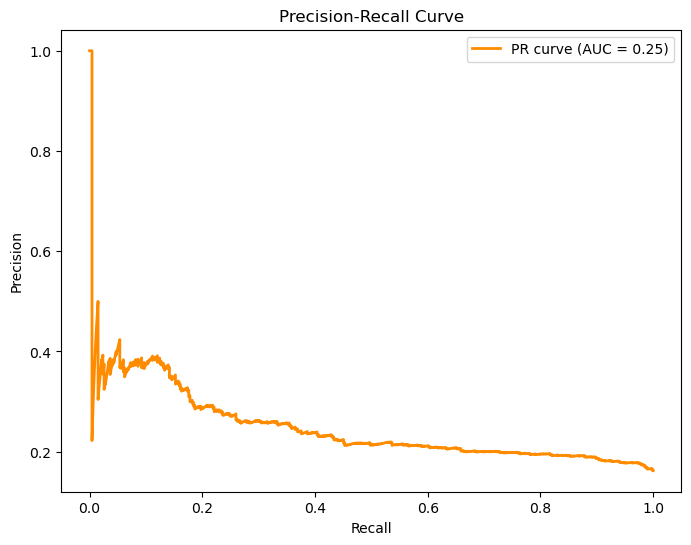

Precision-Recall AUC: 0.25


In [20]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

y_probs = bag_model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_probs)
precision_model1, recall_model1, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

print("Precision-Recall AUC: {:.2f}".format(pr_auc))

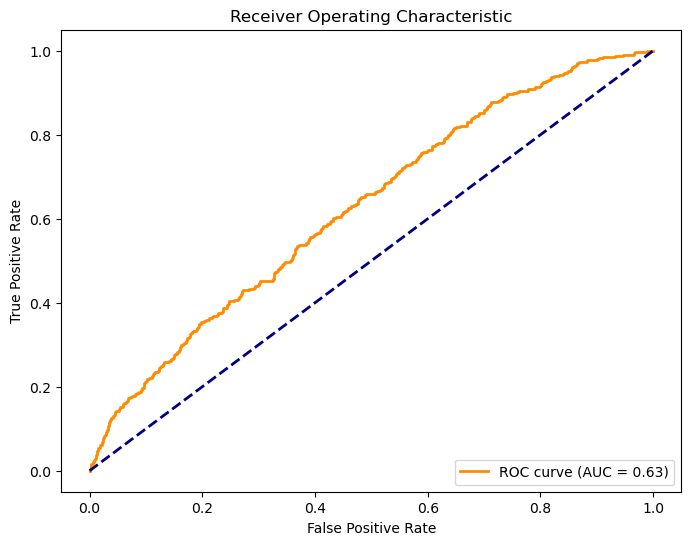

AUC: 0.63


In [21]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
fpr_model1, tpr_model1, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("AUC: {:.2f}".format(roc_auc))

In [22]:
# Decision Tree using CV and hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=32)

dt_params = {
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
}

grid_tree = GridSearchCV(dtc, dt_params, cv=5, scoring='recall')
grid_tree.fit(X_train, y_train)

y_pred = grid_tree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters: ", grid_tree.best_params_)
print("\n",conf_matrix)
print("\nRecall: ", recall)
print("Precision: ", precision)
print("F-1 score: ", f1)
print("Accuracy: ", accuracy)

Best Parameters:  {'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 2}

 [[2330   78]
 [ 419   47]]

Recall:  0.10085836909871244
Precision:  0.376
F-1 score:  0.15905245346869712
Accuracy:  0.8270702853166318


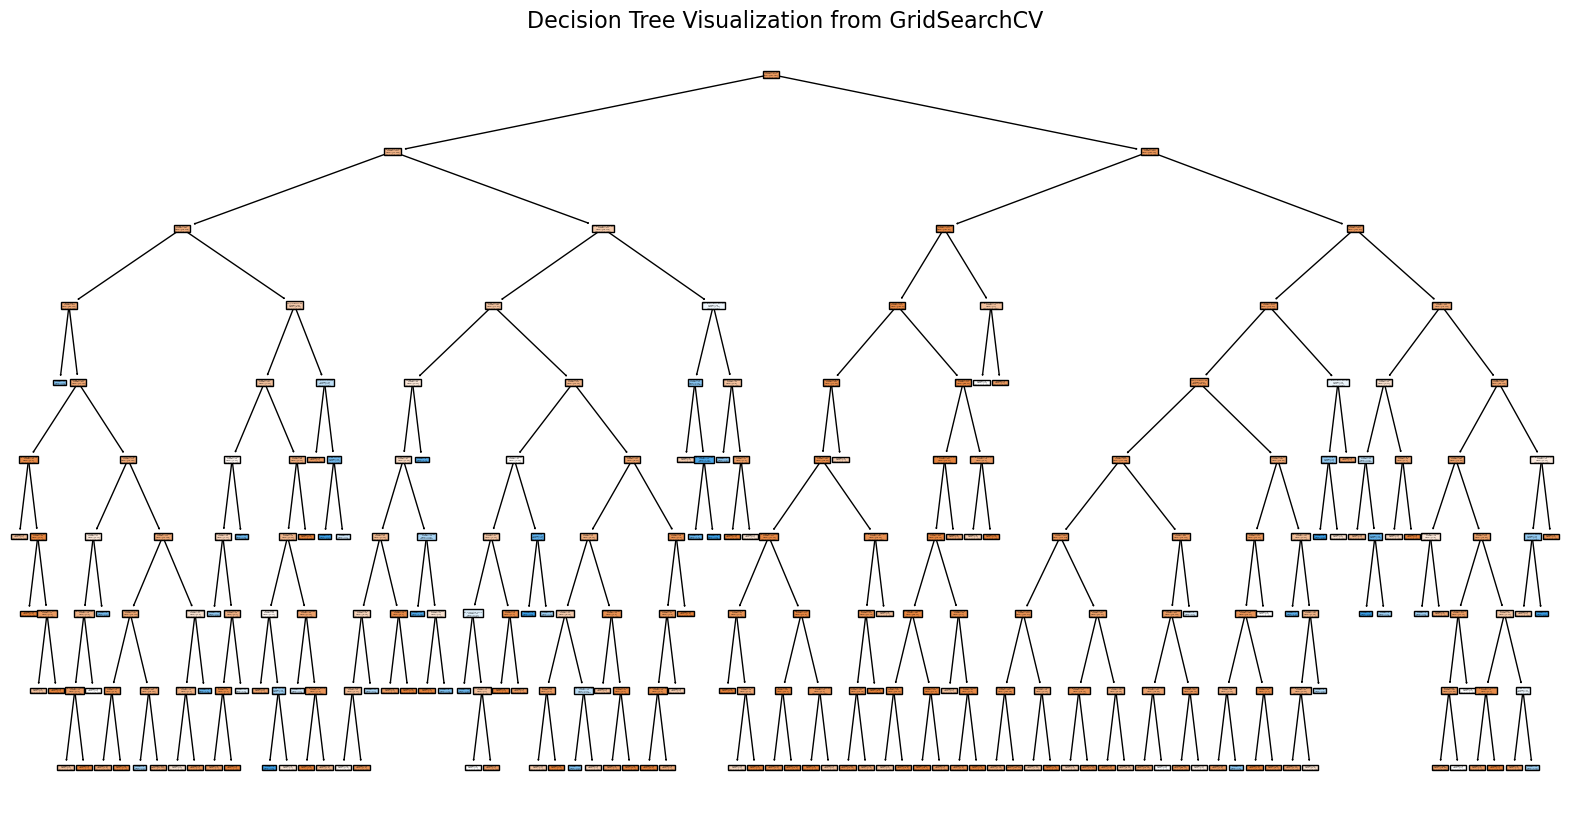

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the best estimator from the grid search
best_dtc = grid_tree.best_estimator_

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dtc,
          feature_names=X_train.columns,  # specify variable names 
          class_names=['Not Fully Paid', 'Fully Paid'],  # specify class names
          filled=True, impurity=False)  # whether to color the boxes, whether to report impurity
plt.title('Decision Tree Visualization from GridSearchCV', fontsize=16)
plt.show()

In [24]:
# Decision Tree using Bagging
dtc = DecisionTreeClassifier(max_depth=9, min_samples_split=6, min_samples_leaf=2, random_state=32)

bag_model = BalancedBaggingClassifier(estimator=dtc, max_samples=1000, n_estimators=1000, bootstrap=True, random_state=32)
bag_model.fit(X_train, y_train)

y_pred = bag_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(conf_matrix)
print("\nRecall: ",recall)
print("Precision is: ",precision)
print("F-1 score is: ",f1)
print("Accuracy: ",accuracy)

[[1502  906]
 [ 166  300]]

Recall:  0.6437768240343348
Precision is:  0.24875621890547264
F-1 score is:  0.3588516746411483
Accuracy:  0.627000695894224


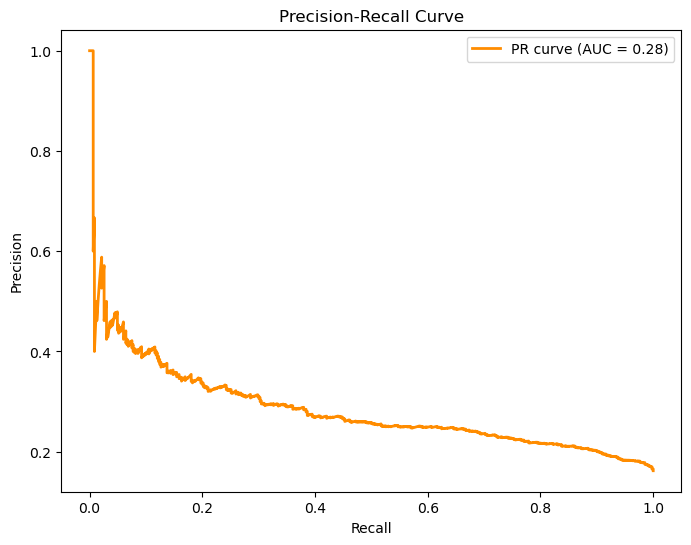

Precision-Recall AUC: 0.28


In [25]:
y_probs = bag_model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_probs)
precision_model2, recall_model2, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

print("Precision-Recall AUC: {:.2f}".format(pr_auc))

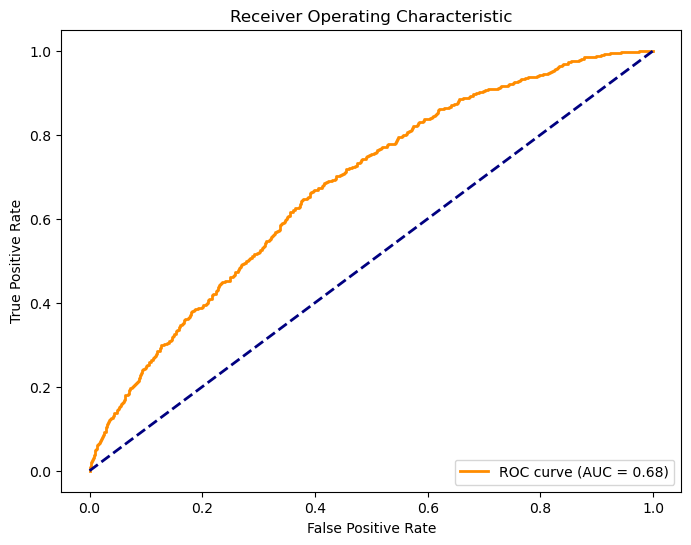

AUC: 0.68


In [26]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
fpr_model2, tpr_model2, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("AUC: {:.2f}".format(roc_auc))

In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, random_state = 32)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(conf_matrix)
print("\nRecall: ",recall)
print("Precision is: ",precision)
print("F-1 score is: ",f1)
print("Accuracy: ",accuracy)

[[2395   13]
 [ 457    9]]

Recall:  0.019313304721030045
Precision is:  0.4090909090909091
F-1 score is:  0.036885245901639344
Accuracy:  0.8364648573416841


In [28]:
#Balanced Random Forest
from imblearn.ensemble import BalancedRandomForestClassifier

brfc = BalancedRandomForestClassifier(n_estimators=2500, random_state=32)
brfc.fit(X_train,y_train)

y_pred = brfc.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(conf_matrix)
print("\nRecall: ",recall)
print("Precision is: ",precision)
print("F-1 score is: ",f1)
print("Accuracy: ",accuracy)

[[1423  985]
 [ 162  304]]

Recall:  0.6523605150214592
Precision is:  0.23584173778122575
F-1 score is:  0.3464387464387464
Accuracy:  0.6009046624913014


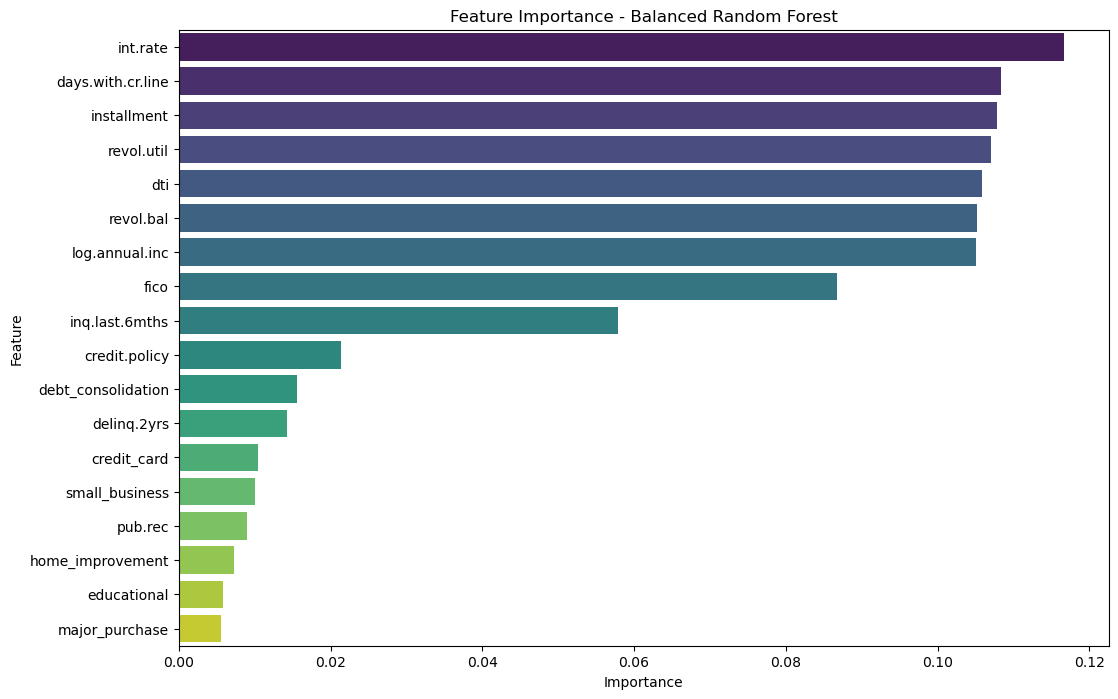

In [40]:
feature_names = X_train.columns
feature_importance = brfc.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Balanced Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

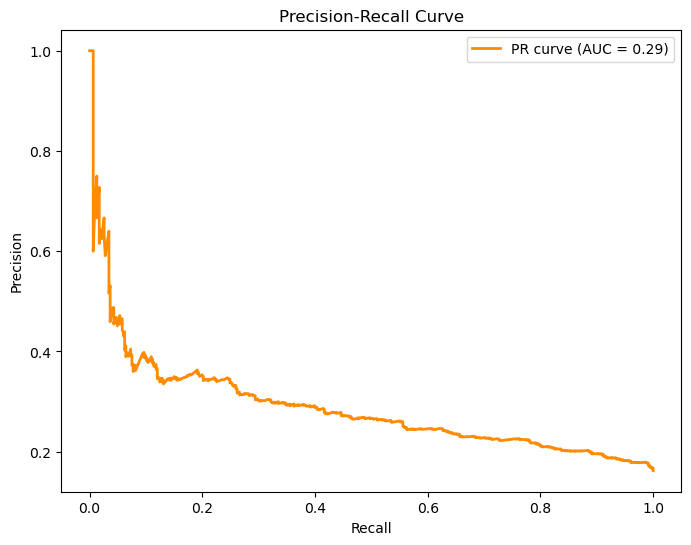

Precision-Recall AUC: 0.29


In [29]:
y_probs = brfc.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_probs)
precision_model3, recall_model3, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

print("Precision-Recall AUC: {:.2f}".format(pr_auc))

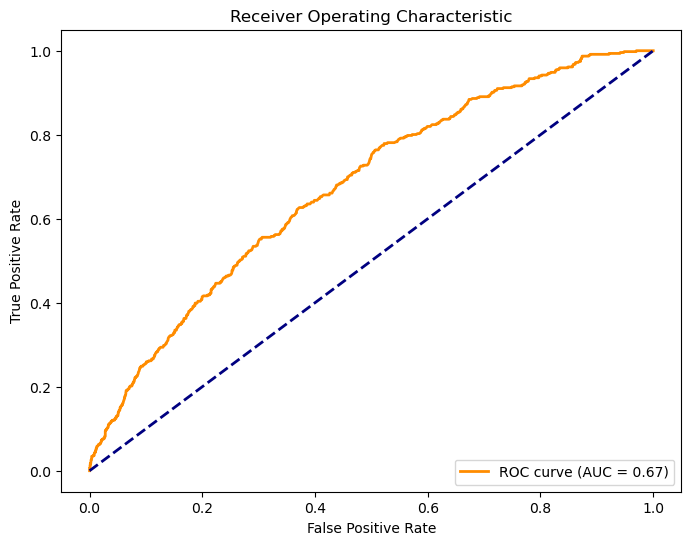

AUC: 0.67


In [30]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
fpr_model3, tpr_model3, _ = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("AUC: {:.2f}".format(roc_auc))

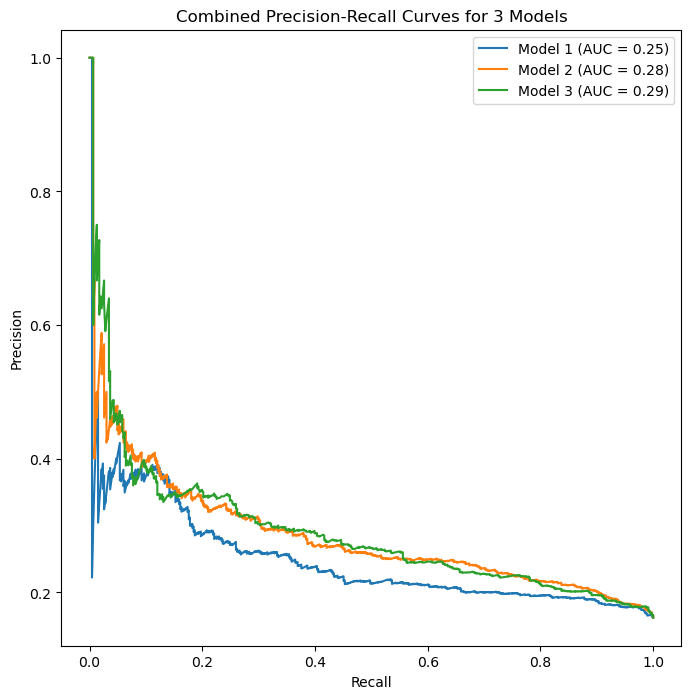

In [32]:
#Combined Precision-Recall curves
plt.figure(figsize=(8, 8))

plt.plot(recall_model1, precision_model1, label='Model 1 (AUC = {:.2f})'.format(auc(recall_model1, precision_model1)))
plt.plot(recall_model2, precision_model2, label='Model 2 (AUC = {:.2f})'.format(auc(recall_model2, precision_model2)))
plt.plot(recall_model3, precision_model3, label='Model 3 (AUC = {:.2f})'.format(auc(recall_model3, precision_model3)))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Combined Precision-Recall Curves for 3 Models')
plt.legend()
plt.show()

#This metric is particularly useful when dealing with imbalanced datasets.
#The Random Forest Classifier has the highest AUC-PR, indicating better performance in capturing positive instances.

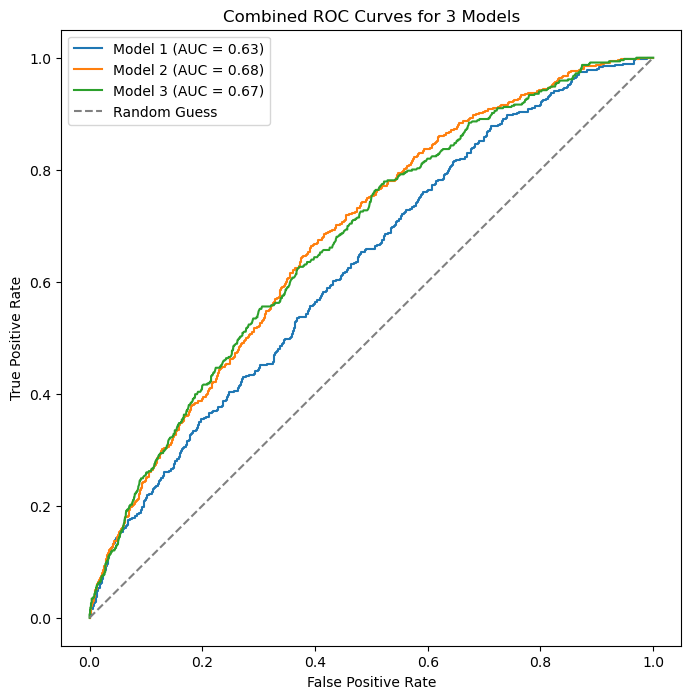

In [31]:
#Combined ROC curves
plt.figure(figsize=(8, 8))

plt.plot(fpr_model1, tpr_model1, label='Model 1 (AUC = {:.2f})'.format(auc(fpr_model1, tpr_model1)))
plt.plot(fpr_model2, tpr_model2, label='Model 2 (AUC = {:.2f})'.format(auc(fpr_model2, tpr_model2)))
plt.plot(fpr_model3, tpr_model3, label='Model 3 (AUC = {:.2f})'.format(auc(fpr_model3, tpr_model3)))

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves for 3 Models')
plt.legend()
plt.show()

#This metric helps evaluate the trade-off between sensitivity and specificity.
#The Decision Tree has the highest AUC-ROC, suggesting better overall discrimination ability.